In [1]:
%matplotlib inline 
from sympy import *
init_printing()

t,x0,x1,m0,m1,rho = symbols("t x0 x1 m0 m1 rho")
R = symbols("R", positive=True, real=True) # in fact R * h

P00 = (1 + 2 * t) * (1 - t)**2
P10 = t * (1 - t)**2
P01 = t**2 * (3 - 2 * t)
P11 = t**2 * (t - 1)
P22 = t**2 * (t - 1)**2

x = x0 * P00 + x1 * P01 + m0 * P10 + m1 * P11 + rho * P22
dx = diff(x, t)
Q = integrate(- R * x**2, (t, 0, 1))

PowerBalance = Eq( Rational(1,2) * (x1**2 - x0**2), Q)
Eq1 = Eq(m1, -R * x1)
Eq2 = Eq(m0, -R * x0)

In [2]:
x1_est = x0*(1-R/2)/(1+R/2)

In [3]:
PB = PowerBalance.subs(m0, -R*x0).subs(m1, -R*x1).subs(x1, x1_est)

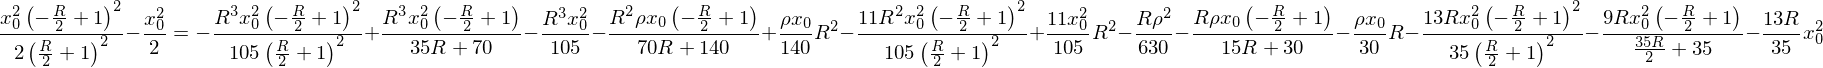

In [4]:
PB

In [5]:
sol = solve(PB, rho)

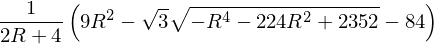

In [6]:
sol[0].subs(x0, 1)

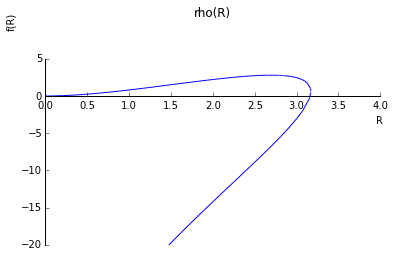

In [37]:
plot(sol[0].subs(x0, 1), sol[1].subs(x0, 1), (R, 0, 4), title="rho(R)", ylim=[-20,10]);

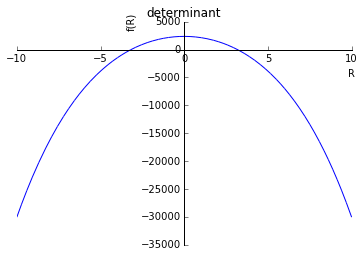

In [18]:
D = -R**4 - 224 * R**2 + 2352
D
plot(D, title='determinant');

In [8]:
x

In [19]:
xt = x.subs(x1, x1_est).subs(m0, -R*x0).subs(m1, -R*x1_est).subs(rho, sol[1])

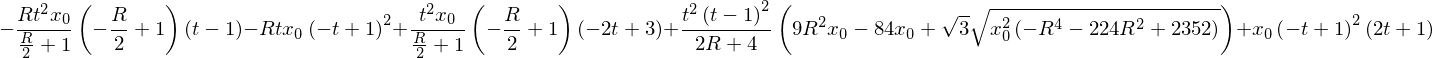

In [20]:
xt

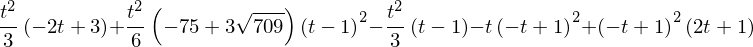

In [21]:
xt_simpl = xt.subs(R, 1).subs(x0, 1)
xt_simpl

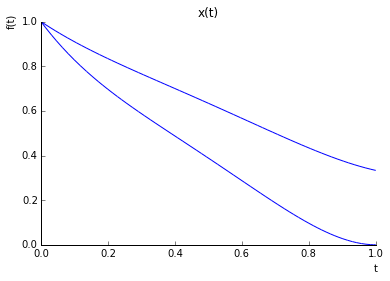

In [24]:
xt_R1 = xt.subs(R, 1).subs(x0, 1)
xt_R2 = xt.subs(R, 2).subs(x0, 1)
plot(xt_R1, xt_R2, (t, 0, 1), title="x(t)", ylim=[0,1]);

In [25]:
dx

In [26]:
x

In [31]:
P1 = (x*dx).subs(x1, x1_est).subs(m0, -R*x0).subs(m1, -R*x1_est).subs(rho, sol[0]).subs(R, 1).subs(x0, 1)
P2 = (x*dx).subs(x1, x1_est).subs(m0, -R*x0).subs(m1, -R*x1_est).subs(rho, sol[1]).subs(R, 1).subs(x0, 1)
Q_simpl = (- R * x**2).subs(x1, x1_est).subs(m0, -R*x0).subs(m1, -R*x1_est).subs(rho, sol[1]).subs(R, 1).subs(x0, 1)

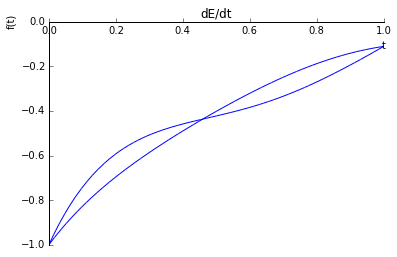

In [32]:
plot(P2, Q_simpl, (t, 0, 1), title="dE/dt", ylim=[-1,0]);